In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import nltk

In [2]:
data = pd.read_csv('data/fr_dataset.csv')
data.head()

,HITId,tweet,sentiment,directness,annotator_sentiment,target,group
0,1,rt @user personnage ainsi q tte la clique gauc...,abusive,direct,shock,origin,other
1,2,@user @user @user bah oui t'as raison l'autre ...,offensive,indirect,shock,other,individual
2,3,moi j'ai personne à qui m'adresser pour réclam...,hateful,direct,anger_confusion_sadness_fear_disgust,other,women
3,4,@user @user c...est vrai que les anchois sont ...,normal,indirect,indifference,other,other
4,5,eh les renois faut se réveiller la @url,normal,direct,sadness,origin,african_descent


In [3]:
data.columns

Index(['HITId', 'tweet', 'sentiment', 'directness', 'annotator_sentiment',
       'target', 'group'],
      dtype='object')

In [4]:
data['sentiment'].unique()
data['sentiment'].value_counts()

sentiment
offensive                                          1336
normal                                              821
abusive                                             594
fearful                                             236
hateful                                             207
                                                   ... 
fearful_offensive_disrespectful_normal                1
fearful_disrespectful_hateful_normal                  1
fearful_abusive_offensive_hateful_disrespectful       1
fearful_offensive_hateful_disrespectful               1
disrespectful_hateful                                 1
Name: count, Length: 69, dtype: int64

['direct' 'indirect']


<Axes: >

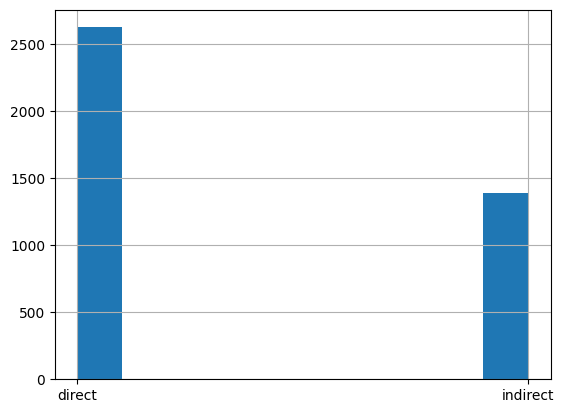

In [5]:
print(data['directness'].unique())
data['directness'].hist()

In [6]:
data['annotator_sentiment'].unique()
data['annotator_sentiment'].value_counts()

annotator_sentiment
indifference                998
sadness                     896
shock                       795
indifference_disgust        142
anger_indifference          106
                           ... 
anger_fear_indifference       1
anger_confusion_shock         1
anger_confusion_sadness       1
anger_fear_shock_disgust      1
anger_fear_shock              1
Name: count, Length: 104, dtype: int64

target
origin                2266
other                 1386
disability             177
religion               146
gender                  27
sexual_orientation      12
Name: count, dtype: int64


<Axes: >

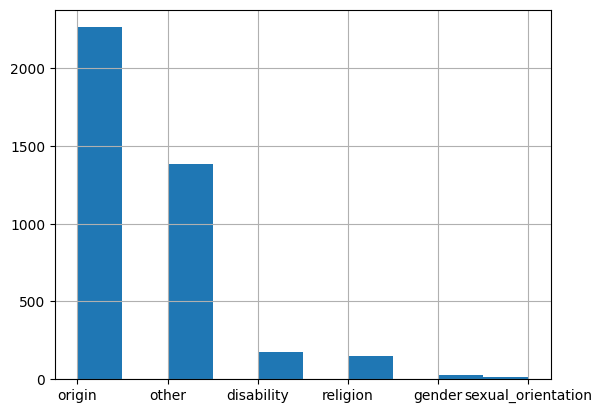

In [15]:
print(data['target'].value_counts())
data['target'].hist()

In [8]:
data['group'].unique()
data['group'].value_counts()

group
other               1085
individual           918
left_wing_people     383
indian/hindu         329
african_descent      311
arabs                298
special_needs        174
immigrants           105
muslims               97
asians                89
jews                  73
women                 62
christian             31
hispanics             25
refugees              25
gay                    9
Name: count, dtype: int64

## Tweets

In [11]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

# Text preprocessing function
def preprocess_text(text, language='french'):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words(language))
    words = [word for word in words if word not in stop_words]
    return words

# Apply preprocessing to the tweet column using French stopwords
data['processed_tweets'] = data['tweet'].apply(preprocess_text, language='french')

# Flatten the list of lists into a single list of words
all_words = [word for tweet in data['processed_tweets'] for word in tweet]

# Count word frequencies
word_freq = Counter(all_words)

# Get the top N words
top_n = 100
top_words = word_freq.most_common(top_n)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [12]:
print("Top words:", top_words)

Top words: [('user', 4113), ('url', 1895), ('’', 1361), ('mongol', 632), ('gauchiste', 499), ('attardé', 445), ('cest', 396), ('renois', 390), ('sale', 327), ('ça', 287), ('rebeus', 268), ('plus', 239), ('arabe', 203), ('comme', 200), ('migrants', 187), ('fait', 173), ('contre', 171), ('quand', 156), ('arabes', 147), ('si', 143), ('tout', 138), ('bien', 136), ('«', 132), ('va', 130), ('faire', 129), ('violence', 122), ('terrorisme', 119), ('trop', 115), ('»', 108), ('tous', 100), ('non', 99), ('a', 97), ('gros', 96), ('quoi', 91), ('rien', 89), ('vraiment', 88), ('dit', 87), ('france', 87), ('dire', 86), ('rt', 84), ('aussi', 84), ('juif', 82), ('jai', 81), ('faut', 81), ('attarde', 81), ('oui', 80), ('être', 79), ('donc', 79), ('juste', 78), ('mdr', 78), ('parle', 73), ('cette', 73), ('ca', 67), ('bon', 66), ('peut', 65), ('encore', 65), ('réfugiés', 63), ('alors', 62), ('merde', 62), ('quel', 60), ('putain', 59), ('ya', 58), ('lavortement', 56), ('là', 56), ('peu', 56), ('comment', 5